# Universality theorem - 3D visualization

The aim of this notebook is to show how we can approximate arbitrary real-valued function with one hidden layer neural network. For our purpose we will construct a network taking two inputs $(x, y)$ and giving one output $(z)$. However, the idea may be generalized to any function $f^{(m)}(x_1,...,x_n): R^n\to R^m$. 

Our example is based on the ideas from Michael Nielsen's [Neural Networks and Deep Learning book (Chapter 4)](http://neuralnetworksanddeeplearning.com/chap4.html) (see problem no. 1), namely:

1. construct a step function rotated around point $(x_0, y_0)$ by $\alpha$ angle
2. add up step functions for $0° \leq \alpha < 180°$ in order to build a tower function 
3. add up tower functions in order to approximate an exemplary $f(x,y)$ function

Equations for linear functions that build our step function are given by the formula:

$$ -y \cos\alpha + x \sin\alpha + \cos\alpha \, (y_0 \pm R\cos\alpha)
- \sin\alpha \, (x_0 \mp R\sin\alpha) = 0$$

where $R$ is a distance from both linear functions to $(x_0, y_0)$.

### Caveat

Below we consider approximation of a real-valued function. To this purpose, we dsiregard activation of the output unit, which is the case e.g. when probability is calculated instead.  

In [2]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

### Functions

In [3]:
def sigmoid(z):
    '''Returns sigmoid activation function for a given matrix z.'''
    
    return 1./(1. + np.exp(-z))


def step_function(x, y, alpha, R, x0, y0, h, W=100):
    '''
    Returns approximate step function for a given matrices x, y.
    Step function is enclosed between two lines, rotated by alpha angle around 
    point (x0, y0) and moved from this point by R (2 * R might be understood as the width). 
    Its height is given by h. The larger W the sharper step.'''
    
    sin_alpha = np.sin(alpha * np.pi / 180)
    cos_alpha = np.cos(alpha * np.pi / 180)
    Wx = sin_alpha
    Wy = -cos_alpha
    b1 = cos_alpha * (y0 + R * cos_alpha) - sin_alpha * (x0 - R * sin_alpha)
    b2 = cos_alpha * (y0 - R * cos_alpha) - sin_alpha * (x0 + R * sin_alpha)
    n1 = sigmoid(W * (Wx * x + Wy * y + b1))
    n2 = sigmoid(W * (Wx * x + Wy * y + b2))
    
    return h * (n1 - n2)


def output(x, y, points, R=.05, n=100):
    '''
    Returns output from a neural network with one hidden layer for matrices x, y
    and points to be approximated.
    points - list of tuples of the form (x0, y0, h)
    n - number of neurons per point
    '''

    activation = np.zeros(x.shape)
    bias = 0
    
    for point in points:    
        x0, y0, h = point
        for alpha in np.arange(0, 180, 180/n):
            activation += step_function(x, y, alpha, R, x0, y0, h/n)
        bias -= h/n
        
    activation += bias
    return activation

### Calculation & plots

Let's consider a toy model i.e. approximate sparse function defined by three separate points:

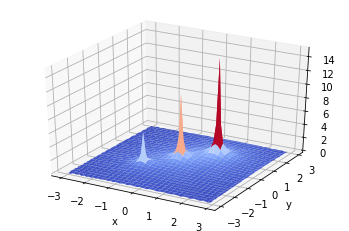

In [5]:
x = np.arange(-3, 3, 0.1)
y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)

points = [(-1, -1, 5), (0, 0, 10), (1, 1, 15)]

Z = output(X, Y, points)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_zlim(0.0, 15.)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

### Projection across x axis

Below we plot 1D projection (light blue curve) and compare it with the input data points (horizontal red lines) and zero (black horizontal line).

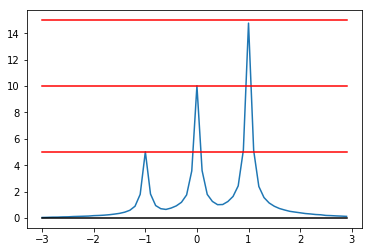

In [6]:
plt.plot(x, np.max(Z, axis=0)) # projection across x axis
for point in points:
    plt.plot([x[0], x[-1]], [point[-1], point[-1]], 'r')
plt.plot([x[0], x[-1]], [0, 0], 'k')
plt.show()

### Comments:

- The smaller $R$ and larger $n$, the better approximation.
- For $n\to\infty$, bias tends to 0.